In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import mpl
import seaborn as sns

In [350]:
data_train = pd.read_csv('train.csv')
data_test = pd.read_csv('test.csv')
data = pd.concat([data_train,data_test],sort='False',ignore_index=False)
data.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450


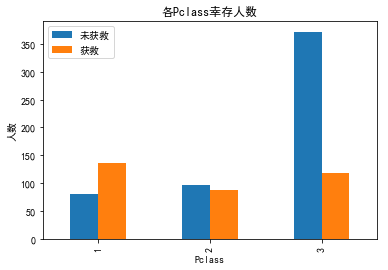

In [357]:
mpl.rcParams['font.sans-serif'] = ['SimHei']
def survivedFactorPlot(data_train,col,k='bar'):
    Survived_0 = data_train[col][data_train.Survived == 0].value_counts()
    Survived_1 = data_train[col][data_train.Survived == 1].value_counts()
    df=pd.DataFrame({u'未获救':Survived_0,u'获救':Survived_1})
    df.plot(kind=k)
    plt.title(f"各{col}幸存人数")
    plt.xlabel(col) 
    plt.ylabel(u"人数") 
    plt.show()
survivedFactorPlot(data_train,'Pclass')

In [29]:
#根据称谓划分，名字长度和是否有括号太玄学了
def splitName(data_train):
    alltitles = data_train.Name.str.extract('([A-Za-z]+)\.')[0].value_counts()
    titles = alltitles.index.tolist()
    littles = ['Capt','Don','Dona','Jonkheer','Major','Rev','Sir','Col']
    middles = ['Dr','Countess','Mlle','Lady','Mme','Ms']
    for title in titles:
        data_train.loc[data_train.Name.str.contains(title),'Title']=title
    for little in littles:
        data_train.loc[data_train.Name.str.contains(little),'Title']='little'
    for middle in middles:
        data_train.loc[data_train.Name.str.contains(middle),'Title']='middle'
    return data_train

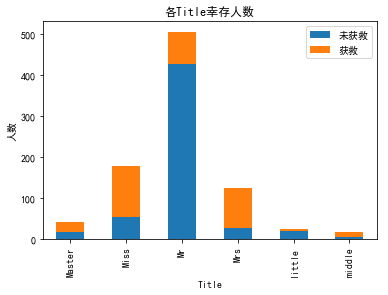

Mr        506
Miss      178
Mrs       125
Master     40
little     25
middle     17
Name: Title, dtype: int64

In [28]:
splitName(data)
survivedFactorPlot(data[:data_train.shape[0]],'Title')
data[:data_train.shape[0]].Title.value_counts()

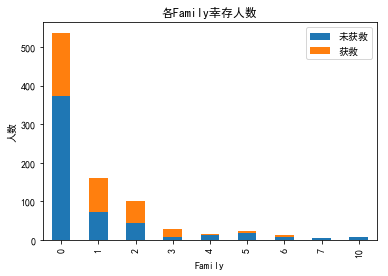

In [50]:
data['Family'] = data.eval('SibSp+Parch')
survivedFactorPlot(data,'Family')

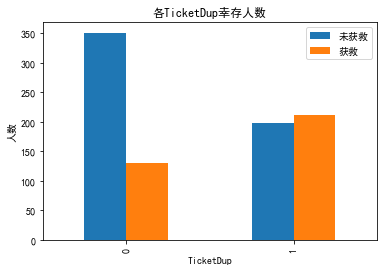

In [53]:
#ticket是否相同可以作为一个特征
#如果用duplicate函数只能得到一半的标记
def ticketSame(data_train):
    dup_counts = data_train.groupby('Ticket')['Ticket'].transform('count')
    data_train['TicketDup'] = dup_counts
    data_train.loc[dup_counts==1,'TicketDup'] = 0#一个人是第一类
    data_train.loc[dup_counts>1,'TicketDup'] = 1#2到4个人是第二类
ticketSame(data)
survivedFactorPlot(data,'TicketDup')

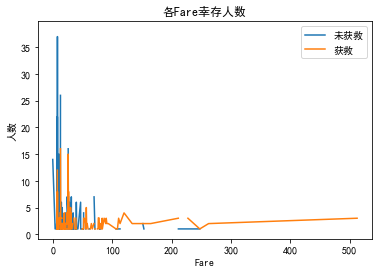

In [54]:
#Fare高活得概率大
survivedFactorPlot(data,'Fare','line')

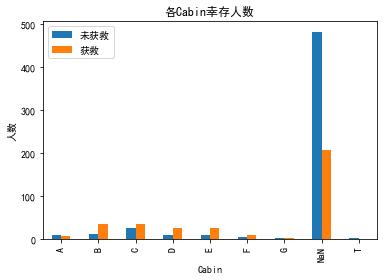

In [60]:
data['Cabin'] = data.Cabin.str[0]
data.loc[data.Cabin.isnull(),'Cabin'] = 'NaN'
survivedFactorPlot(data,'Cabin')

In [70]:
data.loc[data.Embarked.isnull(),'Embarked'] = 'C'
faremedian = np.median(data.Fare[data.Fare.notnull()])
data.loc[data.Fare.isnull(),'Fare'] =faremedian

In [95]:
data2 = pd.concat([data_train,data_test],sort='False',ignore_index=False)
data['Age'] = data2.Age
data.to_csv('all.csv',index=False)

In [76]:
from sklearn.ensemble import RandomForestRegressor

def set_missing_ages(df,cols):

    # 把已有的数值型特征取出来丢进Random Forest Regressor中
    age_df = df[cols]

    # 乘客分成已知年龄和未知年龄两部分
    known_age = age_df[age_df.Age.notnull()].as_matrix()
    unknown_age = age_df[age_df.Age.isnull()].as_matrix()

    # y即目标年龄
    y = known_age[:, 0]

    # X即特征属性值
    X = known_age[:, 1:]

    # fit到RandomForestRegressor之中
    rfr = RandomForestRegressor(random_state=0, n_estimators=2000, n_jobs=-1)
    rfr.fit(X, y)

    # 用得到的模型进行未知年龄结果预测
    predictedAges = rfr.predict(unknown_age[:, 1::])

    # 用得到的预测结果填补原缺失数据
    df.loc[ (df.Age.isnull()), 'Age' ] = predictedAges 

    return df, rfr

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [89]:
data_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 36 columns):
Age             1309 non-null float64
Fare            1309 non-null float64
Pclass_1        1309 non-null uint8
Pclass_2        1309 non-null uint8
Pclass_3        1309 non-null uint8
Cabin_A         1309 non-null uint8
Cabin_B         1309 non-null uint8
Cabin_C         1309 non-null uint8
Cabin_D         1309 non-null uint8
Cabin_E         1309 non-null uint8
Cabin_F         1309 non-null uint8
Cabin_G         1309 non-null uint8
Cabin_NaN       1309 non-null uint8
Cabin_T         1309 non-null uint8
Embarked_C      1309 non-null uint8
Embarked_Q      1309 non-null uint8
Embarked_S      1309 non-null uint8
Title_Master    1309 non-null uint8
Title_Miss      1309 non-null uint8
Title_Mr        1309 non-null uint8
Title_Mrs       1309 non-null uint8
Title_little    1309 non-null uint8
Title_middle    1309 non-null uint8
Sex_female      1309 non-null uint8
Sex_male        1309 non-n

In [80]:
set_missing_ages(data,['Age','Fare', 'Parch', 'SibSp', 'Pclass'])

In [87]:
dummies=['Pclass','Cabin','Embarked','Title','Sex','TicketDup','Family']
data_dummies = pd.get_dummies(data,columns=dummies)
data_dummies = data_dummies.drop(['PassengerId','Survived','Name','Ticket','Parch','SibSp'],axis=1)

In [146]:
import sklearn.preprocessing as preprocessing
scaler = preprocessing.StandardScaler()
age_scale_param = scaler.fit(data_dummies['Age'].values.reshape(-1,1))
data_dummies['Age'] = scaler.fit_transform(data_dummies['Age'].values.reshape(-1,1), age_scale_param)
fare_scale_param = scaler.fit(data_dummies['Fare'].values.reshape(-1,1))
data_dummies['Fare'] = scaler.fit_transform(data_dummies['Fare'].values.reshape(-1,1), fare_scale_param)

In [245]:
from sklearn import linear_model

# 用正则取出我们要的属性值
train_np = data_dummies[:891].as_matrix()

# y即第0列：Survival结果
y = np.array(data_train.Survived)

# X即第1列及以后：特征属性值
X = train_np

# fit到LogisticRegression之中
clf = linear_model.LogisticRegression(C=1.0, penalty='l1', tol=1e-6)
clf.fit(X, y)
sum(clf.predict(X)==y)/X.shape[0]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


0.8406285072951739

In [243]:
data_dummies.head()

,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,...,TicketDup_1,Family_0,Family_1,Family_2,Family_3,Family_4,Family_5,Family_6,Family_7,Family_10
0,22.0,7.2500,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,38.0,71.2833,1,0,0,0,0,1,0,0,...,1,0,1,0,0,0,0,0,0,0
2,26.0,7.9250,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,35.0,53.1000,1,0,0,0,0,1,0,0,...,1,0,1,0,0,0,0,0,0,0
4,35.0,8.0500,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [242]:
rage = pd.read_csv('Rage.csv')
data_dummies.Age = rage.Age
data_dummies.Fare = rage.Fare
#0.78468

In [151]:
predict = clf.predict(data_dummies[891:])
predictdf = pd.DataFrame({'PassengerId':data_test.PassengerId,'Survived':predict.astype(int)})
predictdf.to_csv('logisAge.csv',index=False)
#0.77511

In [313]:
ll = pd.read_csv('gender.csv')
rr = pd.read_csv('gender_submission.csv')
sum(ll.Survived!=rr.Survived)

0

In [99]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [101]:
predict = rf.predict(data_dummies[891:])
predictdf = pd.DataFrame({'PassengerId':data_test.PassengerId,'Survived':predict.astype(int)})
predictdf.to_csv('rf.csv',index=False)
# 0.71291

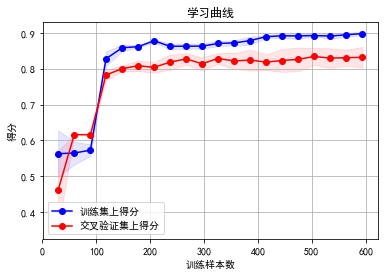

(0.8524859866082368, 0.09960042619319176)

In [280]:
from sklearn.model_selection import learning_curve

# 用sklearn的learning_curve得到training_score和cv_score，使用matplotlib画出learning curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=1, 
                        train_sizes=np.linspace(.05, 1., 20), verbose=0, plot=True):
    """
    画出data在某模型上的learning curve.
    参数解释
    ----------
    estimator : 你用的分类器。
    title : 表格的标题。
    X : 输入的feature，numpy类型
    y : 输入的target vector
    ylim : tuple格式的(ymin, ymax), 设定图像中纵坐标的最低点和最高点
    cv : 做cross-validation的时候，数据分成的份数，其中一份作为cv集，其余n-1份作为training(默认为3份)
    n_jobs : 并行的的任务数(默认1)
    """
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, verbose=verbose)
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    if plot:
        plt.figure()
        plt.title(title)
        if ylim is not None:
            plt.ylim(*ylim)
        plt.xlabel(u"训练样本数")
        plt.ylabel(u"得分")
        plt.gca().invert_yaxis()
        plt.grid()
    
        plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, 
                         alpha=0.1, color="b")
        plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, 
                         alpha=0.1, color="r")
        plt.plot(train_sizes, train_scores_mean, 'o-', color="b", label=u"训练集上得分")
        plt.plot(train_sizes, test_scores_mean, 'o-', color="r", label=u"交叉验证集上得分")
    
        plt.legend(loc="best")
        
        plt.draw()
        plt.gca().invert_yaxis()
        plt.show()
    
    midpoint = ((train_scores_mean[-1] + train_scores_std[-1]) + (test_scores_mean[-1] - test_scores_std[-1])) / 2
    diff = (train_scores_mean[-1] + train_scores_std[-1]) - (test_scores_mean[-1] - test_scores_std[-1])
    return midpoint, diff

plot_learning_curve(gbm2, u"学习曲线", X, y)

In [106]:
from sklearn.ensemble import BaggingRegressor

# fit到BaggingRegressor之中
clf1 = linear_model.LogisticRegression(C=1.0, tol=1e-6)
bagging_clf = BaggingRegressor(clf1, n_estimators=20, max_samples=0.8, max_features=1.0, bootstrap=True, bootstrap_features=False, n_jobs=-1)
bagging_clf.fit(X, y)

predictions = bagging_clf.predict(data_dummies[891:])

result = pd.DataFrame({'PassengerId':data_test['PassengerId'].as_matrix(), 'Survived':predictions.astype(np.int32)})
result.to_csv("bagging2.csv", index=False)
#0.7655

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:10: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


In [180]:
from sklearn import svm
svmclf = svm.SVC(gamma='auto')
svmclf.fit(X,y)
predict = svmclf.predict(data_dummies[891:])
# sum(predict==y)/y.shape[0]
result = pd.DataFrame({'PassengerId':data_test['PassengerId'].as_matrix(), 'Survived':predict.astype(np.int32)})
result.to_csv("svm.csv", index=False)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


In [247]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import cross_validation, metrics
from sklearn.grid_search import GridSearchCV
gbm0 = GradientBoostingClassifier(learning_rate=0.1, n_estimators=100,max_depth=13, min_samples_leaf =5, 
               min_samples_split =50, max_features='sqrt', subsample=0.8, random_state=10)
gbm0.fit(X,y)
y_pred = gbm0.predict(X)
y_predprob = gbm0.predict_proba(X)[:,1]
print(metrics.accuracy_score(y, y_pred))
print(metrics.accuracy_score(y, y_pred))

0.9281705948372615
0.9281705948372615


In [250]:
param_test1 = {'n_estimators':list(range(20,121,10))}
gsearch1 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.2, min_samples_split=30,
                                  min_samples_leaf=20,max_depth=5,max_features='sqrt', subsample=0.8,random_state=10), 
                       param_grid = param_test1, scoring='roc_auc',iid=False,cv=5)
gsearch1.fit(X,y)
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

([mean: 0.87038, std: 0.02061, params: {'n_estimators': 20},
  mean: 0.87191, std: 0.02291, params: {'n_estimators': 30},
  mean: 0.87172, std: 0.01902, params: {'n_estimators': 40},
  mean: 0.87445, std: 0.02153, params: {'n_estimators': 50},
  mean: 0.87508, std: 0.02156, params: {'n_estimators': 60},
  mean: 0.87449, std: 0.02292, params: {'n_estimators': 70},
  mean: 0.87324, std: 0.02409, params: {'n_estimators': 80},
  mean: 0.87193, std: 0.02473, params: {'n_estimators': 90},
  mean: 0.87222, std: 0.02529, params: {'n_estimators': 100},
  mean: 0.87112, std: 0.02444, params: {'n_estimators': 110},
  mean: 0.87011, std: 0.02643, params: {'n_estimators': 120}],
 {'n_estimators': 60},
 0.8750840551980301)

In [254]:
param_test2 = { 'min_samples_split':list(range(5,200,10))}
gsearch2 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.2, n_estimators=60, max_depth=11,min_samples_leaf=20, 
      max_features='sqrt', subsample=0.8, random_state=10), 
   param_grid = param_test2, scoring='roc_auc',iid=False, cv=5)
gsearch2.fit(X,y)
gsearch2.grid_scores_, gsearch2.best_params_, gsearch2.best_score_

([mean: 0.87514, std: 0.03111, params: {'min_samples_split': 5},
  mean: 0.87514, std: 0.03111, params: {'min_samples_split': 15},
  mean: 0.87514, std: 0.03111, params: {'min_samples_split': 25},
  mean: 0.87514, std: 0.03111, params: {'min_samples_split': 35},
  mean: 0.87305, std: 0.02766, params: {'min_samples_split': 45},
  mean: 0.87217, std: 0.02198, params: {'min_samples_split': 55},
  mean: 0.87737, std: 0.02973, params: {'min_samples_split': 65},
  mean: 0.87495, std: 0.02488, params: {'min_samples_split': 75},
  mean: 0.87785, std: 0.03002, params: {'min_samples_split': 85},
  mean: 0.87423, std: 0.02953, params: {'min_samples_split': 95},
  mean: 0.87143, std: 0.02635, params: {'min_samples_split': 105},
  mean: 0.87062, std: 0.02720, params: {'min_samples_split': 115},
  mean: 0.87228, std: 0.02739, params: {'min_samples_split': 125},
  mean: 0.87040, std: 0.03016, params: {'min_samples_split': 135},
  mean: 0.86982, std: 0.02810, params: {'min_samples_split': 145},
  mean

In [261]:
param_test3 = {'min_samples_split':list(range(2,100,5)), 'min_samples_leaf':list(range(2,51,5))}
gsearch3 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.2, n_estimators=60,max_depth=11,
                                     max_features='sqrt', subsample=0.8, random_state=10), 
                       param_grid = param_test3, scoring='roc_auc',iid=False, cv=5)
gsearch3.fit(X,y)
gsearch3.grid_scores_, gsearch3.best_params_, gsearch3.best_score_

([mean: 0.85992, std: 0.04178, params: {'min_samples_leaf': 2, 'min_samples_split': 2},
  mean: 0.85793, std: 0.04133, params: {'min_samples_leaf': 2, 'min_samples_split': 7},
  mean: 0.86724, std: 0.03409, params: {'min_samples_leaf': 2, 'min_samples_split': 12},
  mean: 0.87215, std: 0.02917, params: {'min_samples_leaf': 2, 'min_samples_split': 17},
  mean: 0.87362, std: 0.03085, params: {'min_samples_leaf': 2, 'min_samples_split': 22},
  mean: 0.86558, std: 0.03453, params: {'min_samples_leaf': 2, 'min_samples_split': 27},
  mean: 0.87079, std: 0.03682, params: {'min_samples_leaf': 2, 'min_samples_split': 32},
  mean: 0.87172, std: 0.03278, params: {'min_samples_leaf': 2, 'min_samples_split': 37},
  mean: 0.87147, std: 0.03118, params: {'min_samples_leaf': 2, 'min_samples_split': 42},
  mean: 0.86939, std: 0.03476, params: {'min_samples_leaf': 2, 'min_samples_split': 47},
  mean: 0.87514, std: 0.02827, params: {'min_samples_leaf': 2, 'min_samples_split': 52},
  mean: 0.87112, std: 0

In [265]:

param_test4 = {'max_features':list(range(3,20,2))}
gsearch4 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.2, n_estimators=60,max_depth=11,
                                    min_samples_split=77 ,min_samples_leaf=27,max_features='sqrt', subsample=0.8, random_state=10), 
                       param_grid = param_test4, scoring='roc_auc',iid=False, cv=5)
gsearch4.fit(X,y)
gsearch4.grid_scores_, gsearch4.best_params_, gsearch4.best_score_

([mean: 0.87017, std: 0.02151, params: {'max_features': 3},
  mean: 0.86968, std: 0.02746, params: {'max_features': 5},
  mean: 0.87414, std: 0.02788, params: {'max_features': 7},
  mean: 0.87449, std: 0.02968, params: {'max_features': 9},
  mean: 0.87857, std: 0.02557, params: {'max_features': 11},
  mean: 0.87635, std: 0.02917, params: {'max_features': 13},
  mean: 0.87817, std: 0.02745, params: {'max_features': 15},
  mean: 0.88262, std: 0.02999, params: {'max_features': 17},
  mean: 0.87862, std: 0.02972, params: {'max_features': 19}],
 {'max_features': 17},
 0.8826241994785369)

In [268]:
param_test5 = {'subsample':[0.6,0.7,0.75,0.8,0.85,0.9]}
gsearch5 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.2, n_estimators=60,max_depth=11,max_features=17,
                                    min_samples_split=77 ,min_samples_leaf=27, random_state=10), 
                       param_grid = param_test5, scoring='roc_auc',iid=False, cv=5)
gsearch5.fit(X,y)
gsearch5.grid_scores_, gsearch5.best_params_, gsearch5.best_score_

([mean: 0.87898, std: 0.02581, params: {'subsample': 0.6},
  mean: 0.88060, std: 0.02468, params: {'subsample': 0.7},
  mean: 0.87746, std: 0.02880, params: {'subsample': 0.75},
  mean: 0.88262, std: 0.02999, params: {'subsample': 0.8},
  mean: 0.87731, std: 0.02631, params: {'subsample': 0.85},
  mean: 0.87138, std: 0.02838, params: {'subsample': 0.9}],
 {'subsample': 0.8},
 0.8826241994785369)

In [304]:
gbm2 = GradientBoostingClassifier(learning_rate=0.01, n_estimators=1000,max_depth=11,max_features=17,
                                    min_samples_split=77 ,min_samples_leaf=27,subsample=0.8, random_state=10)
gbm2.fit(X,y)
y_pred = gbm2.predict(X)
y_predprob = gbm2.predict_proba(X)[:,1]
print(metrics.accuracy_score(y, y_pred))
print(metrics.roc_auc_score(y, y_predprob))

0.9046015712682379
0.9642065850722739


In [312]:
# gbpredict = gbm2.predict(data_dummies[891:])
data_test.Sex[data_test.Sex=='male']=0
data_test.Sex[data_test.Sex=='female']=1
result = pd.DataFrame({'PassengerId':data_test['PassengerId'].as_matrix(), 'Survived':data_test.Sex.astype(np.int32)})
result.to_csv("gender.csv", index=False)
# gbpredict.shape

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


In [339]:
data_test = pd.read_csv('test.csv')
def splitName(data_train):
    alltitles = data_train.Name.str.extract('([A-Za-z]+)\.')[0].value_counts()
    titles = alltitles.index.tolist()
    littles = ['Capt','Don','Dona','Jonkheer','Major','Rev','Sir','Col']
    middles = ['Dr','Countess','Mlle','Lady','Mme','Ms']
    for title in titles:
        data_train.loc[data_train.Name.str.contains(title),'Title']=title
splitName(data_test)
data_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Mrs
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Mr
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Mr
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Mrs


In [342]:
data_test.Title.value_counts()

Mr        236
Miss       77
Mrs        69
Master     20
Dr          6
Col         5
Rev         2
Dona        2
Ms          1
Name: Title, dtype: int64

In [343]:
def tree(data_train):
    data_train['Surv'] = 0
    data_train.loc[(data_train.Sex=='female')&(data_train.Pclass!=3),'Surv'] = 1
    data_train.loc[(data_train.Sex=='female')&(data_train.Pclass==3)&(data_train.Embarked!='S'),'Surv'] = 1
#     data_train.loc[(data_train.Sex=='male')&(data_train.Title=='Master'),'Surv'] = 1
    result = pd.DataFrame({'PassengerId':data_train['PassengerId'].as_matrix(), 'Survived':data_train.Surv.astype(np.int32)})
    result.to_csv("tree.csv", index=False)
# sum(data_train.Surv == data_train.Survived) / 891
tree(data_test)
#0.7799

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
